# Customer Segmentation with K-Means

*Author: Eda AYDIN*

## Table of Contents

- [Import Libraries](#import-libraries)
- [Dataset History](#dataset-history)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing & Feature Engineering](#data-preprocessing--feature-engineering)
- [LOG Transformation](#log-transformation)
- [Encoding / Scaling](#encoding--scaling)
- [Modeling](#modeling)
  - [Determining Optimal Numbers of Cluster (Elbow Method)](#determining-optimal-numbers-of-cluster-elbow-method)
  - [K-Means](#k-means)
  - [Hierarchical Clustering](#hierarchical-clustering)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",50)
pd.set_option("display.float_format", lambda x: "%.2f" %x)
pd.set_option("display.width",None)
warnings.filterwarnings("ignore")

## Dataset History

Online Retail II isimli veri seti İngiltere merkezli bir perakende şirketinin 01/12/2009 - 09/12/2011 tarihleri arasındaki online satış işlemlerini içeriyor. Şirketin ürün kataloğunda hediyelik eşyalar yer almaktadır ve çoğu müşterisinin toptancı olduğu bilgisi mevcuttur.

<table style="border-collapse: collapse; width: 100%; height: 162px;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;"><strong>Features</strong></td>
<td style="width: 65.0818%; height: 18px;"><strong>A&ccedil;ıklama</strong></td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">InvoiceNo</td>
<td style="width: 65.0818%; height: 18px;">Fatura Numarası (Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.)</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">StockCode</td>
<td style="width: 65.0818%; height: 18px;">&Uuml;r&uuml;n Kodu (Her bir &uuml;r&uuml;n i&ccedil;in eşsiz)</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">Description</td>
<td style="width: 65.0818%; height: 18px;">&Uuml;r&uuml;n ismi</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">Quantity</td>
<td style="width: 65.0818%; height: 18px;">&Uuml;r&uuml;n adedi (Faturalardaki &uuml;r&uuml;nlerde ka&ccedil;ar tane satıldığı)</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">InvoiceDate</td>
<td style="width: 65.0818%; height: 18px;">Fatura Tarihi</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">UnitPrice</td>
<td style="width: 65.0818%; height: 18px;">Fatura Fiyatı (Sterlin)</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">CustomerID</td>
<td style="width: 65.0818%; height: 18px;">Eşsiz m&uuml;şteri numarası</td>
</tr>
<tr style="height: 18px;">
<td style="width: 1.58479%; height: 18px;">Country</td>
<td style="width: 65.0818%; height: 18px;">&Uuml;lke ismi</td>
</tr>
</tbody>
</table>

In [3]:
df_ = pd.read_excel("dataset/online_retail_II.xlsx")
df_.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [4]:
df = df_.copy()

## Exploratory Data Analysis

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n")
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("\n")
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("\n")
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("\n")
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("\n")
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99]).T)

In [6]:
def select_country(dataframe, country):
    new_dataframe = dataframe.loc[dataframe["Country"] == country]
    return new_dataframe

In [7]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [8]:
check_df(df)

##################### Shape #####################
(525461, 8)


##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0

In [9]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df, categorical_threshold=5, cardinal_threshold=20)

Observations: 525461
Variables: 8
categorical_cols: 0
numerical_cols: 4
cardinal_cols: 4
nominal_cols: 0


In [10]:
numerical_cols
# InvoiceDate saat ve tarih değerlerini içeriyor. Yani aslında anlamlı bir sayısal değişken değil. Tarih ve saat değerleri ayrıştırılabilir.


['Quantity', 'InvoiceDate', 'Price', 'Customer ID']

In [11]:
cardinal_cols

['Invoice', 'StockCode', 'Description', 'Country']

## Data Preprocessing & Feature Engineering

In [12]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Checking the outliers for each columns

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        q1 (float, optional): Quartile 1 Value of specified column. Defaults to 0.25.
        q3 (float, optional): Quartile 3 Value of specified column.. Defaults to 0.75.

    Returns:
        boolean: If the specified column has outlier values, return True. If not, return False.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [13]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Return the lower and upper limit of each columns. 

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        q1 (float, optional): _description_. Defaults to 0.25.
        q3 (float, optional): _description_. Defaults to 0.75.

    Returns:
        low_limit (float): Returns the lower limit by using quartile1 and interquantile range values for each columns.
        up_limit (float) : Returns the upper limit by using quartile3 and interquantile range values for each columns.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [14]:
def replace_with_thresholds(dataframe, col_name):
    """
    Replacing values ​​in Outlier with lower and upper bounds

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column name with the outlier values are to be retrieved.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [15]:
# InvoiceNo içerisinde C bulunan değerleri baskılama ile çıkar. Çünkü bu işlemler iptal edilen işlemlerdir.
df = df[~df["Invoice"].str.contains("C",na=False)]

In [16]:
# Quantity (Ürün adedi) sayısının 0'dan büyük olanları al.
df = df[(df["Quantity"] > 0)]
df.dropna(inplace=True)

In [17]:
check_df(df)

# Artık Nan verimiz kalmadı.
# 117.766 verimiz veri setinden çıkarıldı.

##################### Shape #####################
(407695, 8)


##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0

In [18]:
# Price değeri 0 olup, elimizde ürün kodu unique olan değerler
df[df["Price"] == 0]["StockCode"].unique()

array([22076, 48185, 'M', 22065, 22142, 85042, 21143, 79320, 22355, 21533,
       'TEST001', 21662, 22459, 22458, 22376, 21765, 20914, 22423, 22690,
       22472, 22202, '46000M', 22218, 22630, 22121, 21843, 22624, 22846,
       22845, 22841], dtype=object)

In [19]:
# StockCode içerisinde M olan değerleri çıkar.
df = df[df["StockCode"] != "M"]

In [20]:
# StockCode içerisinde uygun olmayan kod isimlerini getir.
invalid_codes = df[df["StockCode"].astype (str).str.contains (r"[a-zA-Z]{3,}")]["StockCode"].unique ().tolist ()
invalid_codes

['POST', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'ADJUST2']

In [21]:
# Yukarıda bulunan invalid_codes değerlerini çıkarmadan önce herhangi bir şekilde uyumlu olma ihtimali alma diye tekrardan bakıyoruz.
df[df["StockCode"].isin (invalid_codes)].groupby (["StockCode"]).agg ({"Invoice":"nunique",
                                                                       "Quantity": "sum",
                                                                       "Price": "sum",
                                                                       "Customer ID": "nunique"})

,Invoice,Quantity,Price,Customer ID
StockCode,,,,
ADJUST,32,32,3538.52,25
ADJUST2,3,3,731.05,3
BANK CHARGES,20,20,300.00,12
PADS,14,14,0.01,12
POST,738,2212,19964.83,230
TEST001,11,60,40.50,4
TEST002,1,1,1.00,1


In [22]:
# Kümeleme yaklaşımına gittiğimiz için, Kümeleme mantığına yanlış bir yaklaşım sergileyeceğini düşündüğümüz invalid_codes değerlerini veri setinden çıkarıyoruz.
df = df[~df["StockCode"].isin (invalid_codes)].reset_index (drop=True)

In [23]:
# Quantity max değerlerinde şu anda halen outlier değerler içeriyor. Ona tekrardan bakılacak.
# Price değerinin max değerine tekrardan bakılacak.
check_df(df)

##################### Shape #####################
(406450, 8)


##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0

In [24]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [25]:
check_df(df)

##################### Shape #####################
(406450, 9)


##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object


##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom 

In [26]:
max_invoice_date = df["InvoiceDate"].max ()

In [27]:
today_date = (max_invoice_date + dt.timedelta (days=2))

In [28]:
rfm = df.groupby ("Customer ID").agg ({"InvoiceDate": lambda date: (today_date - date.max ()).days,
                                       "Invoice": "nunique",
                                       "TotalPrice": "sum"})

In [29]:
rfm.head ()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,166,2,169.36
12347.00,4,2,1323.32
12348.00,75,1,221.16
12349.00,44,2,2221.14
12351.00,12,1,300.93


In [30]:
rfm.columns = ["Recency", "Frequency", "Monetary"]

In [31]:
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [32]:
check_df(rfm)

##################### Shape #####################
(4286, 3)


##################### Types #####################
Recency        int64
Frequency      int64
Monetary     float64
dtype: object


##################### Head #####################
             Recency  Frequency  Monetary
Customer ID                              
12346.00         166          2    169.36
12347.00           4          2   1323.32
12348.00          75          1    221.16
12349.00          44          2   2221.14
12351.00          12          1    300.93


##################### Tail #####################
             Recency  Frequency  Monetary
Customer ID                              
18283.00          19          6    641.77
18284.00          68          1    461.68
18285.00         297          1    427.00
18286.00         113          2   1296.43
18287.00          19          4   2345.71


##################### NA #####################
Recency      0
Frequency    0
Monetary     0
dtype: int64


############

In [33]:
for col in rfm.columns:
    print (col, check_outlier (rfm, col))

Recency True
Frequency True
Monetary True


In [34]:
for col in rfm.columns:
    replace_with_thresholds (rfm, col)

In [35]:
check_df(rfm)

##################### Shape #####################
(4286, 3)


##################### Types #####################
Recency      float64
Frequency      int64
Monetary     float64
dtype: object


##################### Head #####################
             Recency  Frequency  Monetary
Customer ID                              
12346.00      166.00          2    169.36
12347.00        4.00          2   1323.32
12348.00       75.00          1    221.16
12349.00       44.00          2   2221.14
12351.00       12.00          1    300.93


##################### Tail #####################
             Recency  Frequency  Monetary
Customer ID                              
18283.00       19.00          6    641.77
18284.00       68.00          1    461.68
18285.00      297.00          1    427.00
18286.00      113.00          2   1296.43
18287.00       19.00          4   2345.71


##################### NA #####################
Recency      0
Frequency    0
Monetary     0
dtype: int64


############

In [36]:
def histogram(dataframe, col_name, plot=False):
    dataframe[col_name].hist(bins=20)
    plt.title("Histogram of {}".format(col_name))
    if plot== True:
        plt.savefig("Histogram of {}.png".format(col_name))
        plt.show()
    else:
        plt.show()

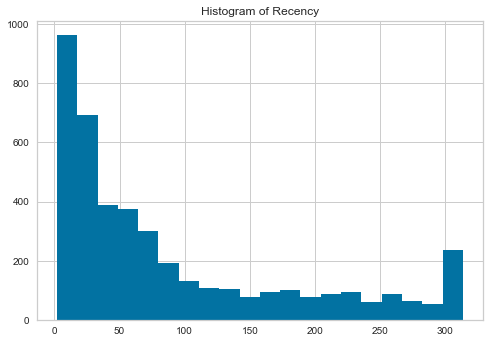

In [37]:
histogram(dataframe=rfm,
          col_name="Recency",
          plot=True)

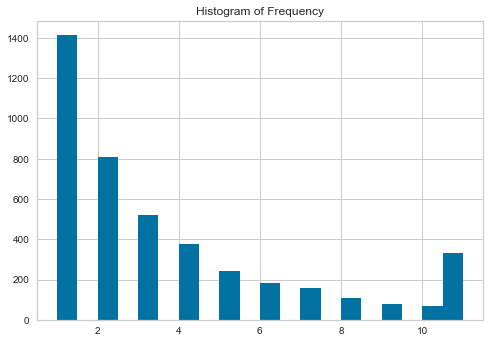

In [38]:
histogram(dataframe=rfm,
          col_name="Frequency",
          plot=True)

## LOG Transformation

In [39]:
# Recency ve Frequency sütunlarına dağılımlarını normale yaklaştırmak(ölçeklendirmek) için loglama işlemi uyguluyoruz.
for col in ["Recency", "Frequency"]:
    rfm[f"LOG_{col}"] = np.log1p (rfm[col])
rfm.head ()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency
Customer ID,,,,,
12346.00,166.00,2,169.36,5.12,1.10
12347.00,4.00,2,1323.32,1.61,1.10
12348.00,75.00,1,221.16,4.33,0.69
12349.00,44.00,2,2221.14,3.81,1.10
12351.00,12.00,1,300.93,2.56,0.69


## Encoding / Scaling

In [40]:
sc = StandardScaler ()
sc.fit (rfm[["LOG_Recency", "LOG_Frequency"]])
scaled_rf = sc.transform (rfm[["LOG_Recency", "LOG_Frequency"]])

In [41]:
scaled_df = pd.DataFrame (index=rfm.index, columns=["LOG_Recency", "LOG_Frequency"], data=scaled_rf)
scaled_df

,LOG_Recency,LOG_Frequency
Customer ID,,
12346.00,1.00,-0.39
12347.00,-1.86,-0.39
12348.00,0.36,-1.07
12349.00,-0.07,-0.39
12351.00,-1.08,-1.07
...,...,...
18283.00,-0.73,1.02
18284.00,0.28,-1.07
18285.00,1.47,-1.07


## Modeling

### Determining Optimal Numbers of Cluster (Elbow Method)

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

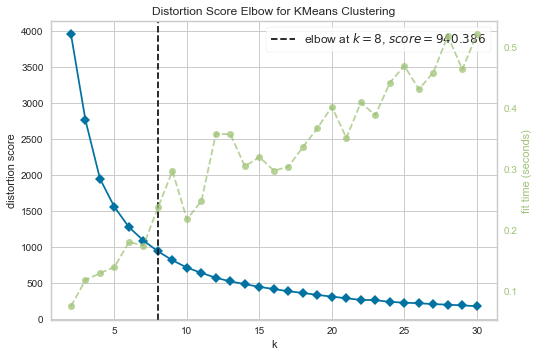

In [51]:
kmeans = KMeans ()
elbow = KElbowVisualizer (kmeans, k=30)
elbow.fit(scaled_df)
elbow.show(outpath="Distortion Score Elbow for KMeans Clustering.png")

In [43]:
cluster_number = elbow.elbow_value_
print(cluster_number)

8


### K-Means

In [44]:
k_means = KMeans(n_clusters=cluster_number,
                 random_state=99).fit(scaled_df)

In [45]:
labels = k_means.labels_
labels

array([7, 6, 2, ..., 0, 7, 1])

In [46]:
rfm["KMeans_Labels"] = labels

In [47]:
rfm.head()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency,KMeans_Labels
Customer ID,,,,,,
12346.00,166.00,2,169.36,5.12,1.10,7
12347.00,4.00,2,1323.32,1.61,1.10,6
12348.00,75.00,1,221.16,4.33,0.69,2
12349.00,44.00,2,2221.14,3.81,1.10,2
12351.00,12.00,1,300.93,2.56,0.69,6


In [48]:
rfm.groupby ("KMeans_Labels").agg ({"Recency": ["mean", "median", "count"],
                                    "Frequency": ["mean", "median", "count"],
                                    "Monetary": ["mean", "median", "count"]})

Recency              Frequency              Monetary          \
                 mean median count      mean median count     mean  median   
KMeans_Labels                                                                
0              233.82 239.00   755      1.00   1.00   755   305.49  225.55   
1               20.26  18.00   490      4.16   4.00   490  1401.30 1160.09   
2               53.30  52.00   842      1.37   1.00   842   506.83  354.55   
3                6.01   5.00   434      9.05  10.00   434  2891.30 3340.07   
4               82.19  69.00   544      4.17   4.00   544  1553.26 1307.57   
5               39.42  31.00   393      8.89   9.00   393  2848.48 3063.84   
6               12.26  12.00   350      1.78   2.00   350   561.62  425.99   
7              182.73 177.50   478      2.38   2.00   478   766.69  604.15   

                     
              count  
KMeans_Labels        
0               755  
1               490  
2               842  
3               434  
4               544  
5               393  
6               350  
7               478

In [52]:
def boxplot(x,y,dataframe,save_plot=False):
    plt.figure(figsize=(20,10))
    sns.boxplot(x=x,y=y,data=dataframe)
    if save_plot == True:
        plt.savefig("{} - {} Boxplot.png".format(x,y))
        plt.show()
    else:
        plt.show()

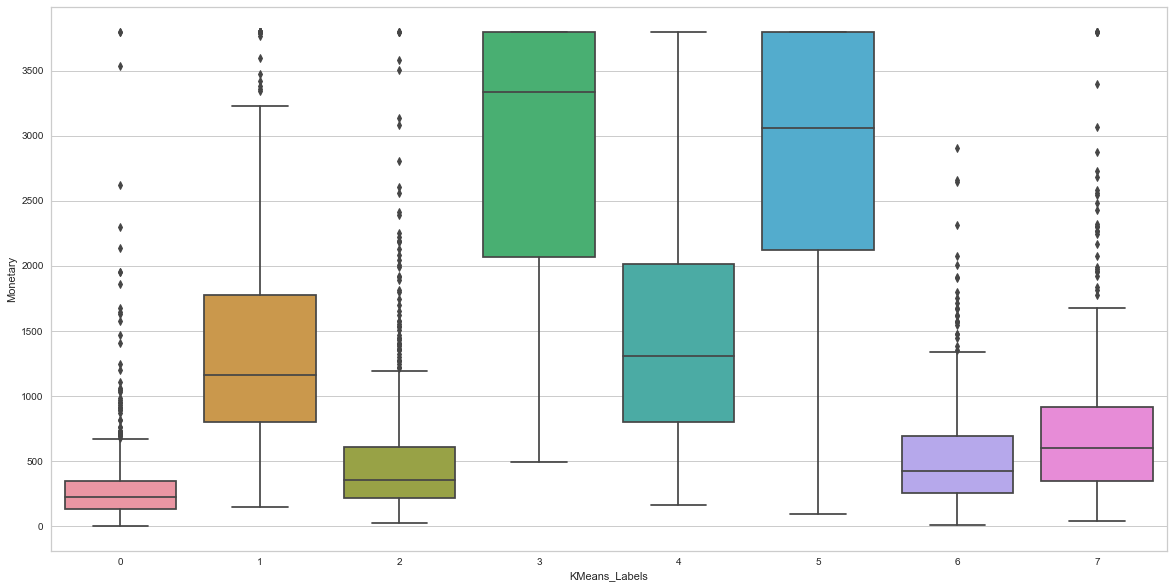

In [53]:
boxplot("KMeans_Labels","Monetary",rfm,True)

### Hierarchical Clustering

In [54]:
hc_complete = linkage (scaled_df, 'complete')

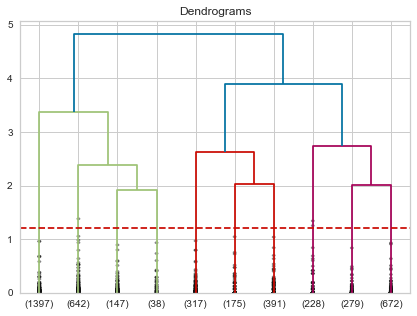

In [55]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram (hc_complete,
                   truncate_mode="lastp",
                   p=10,
                   show_contracted=True,
                   leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.savefig("Hierarchical Clustering - Dendrograms.png")
plt.show()

In [56]:
hc = AgglomerativeClustering (n_clusters=6)
segments = hc.fit_predict (scaled_df)
rfm["Hierarchical_Labels"] = segments
rfm.groupby ("Hierarchical_Labels").agg ({"Recency": ["mean", "median", "count"],
                                         "Frequency": ["mean", "median", "count"],
                                         "Monetary": ["mean", "median", "count"]})


Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Hierarchical_Labels                                                        
0                    114.95  86.00  1168      2.72   2.00  1168   962.48   
1                      5.22   4.00   468      8.13  10.00   468  2594.66   
2                     41.12  34.00   828      1.20   1.00   828   423.84   
3                    234.17 239.00   753      1.00   1.00   753   305.86   
4                     57.97  50.00   459      8.22   8.00   459  2695.60   
5                     19.86  18.00   610      4.75   5.00   610  1589.05   

                                   
                     median count  
Hierarchical_Labels                
0                    721.25  1168  
1                   2767.07   468  
2                    310.75   828  
3                    226.30   753  
4                   2841.07   459  
5                   1298.22   610

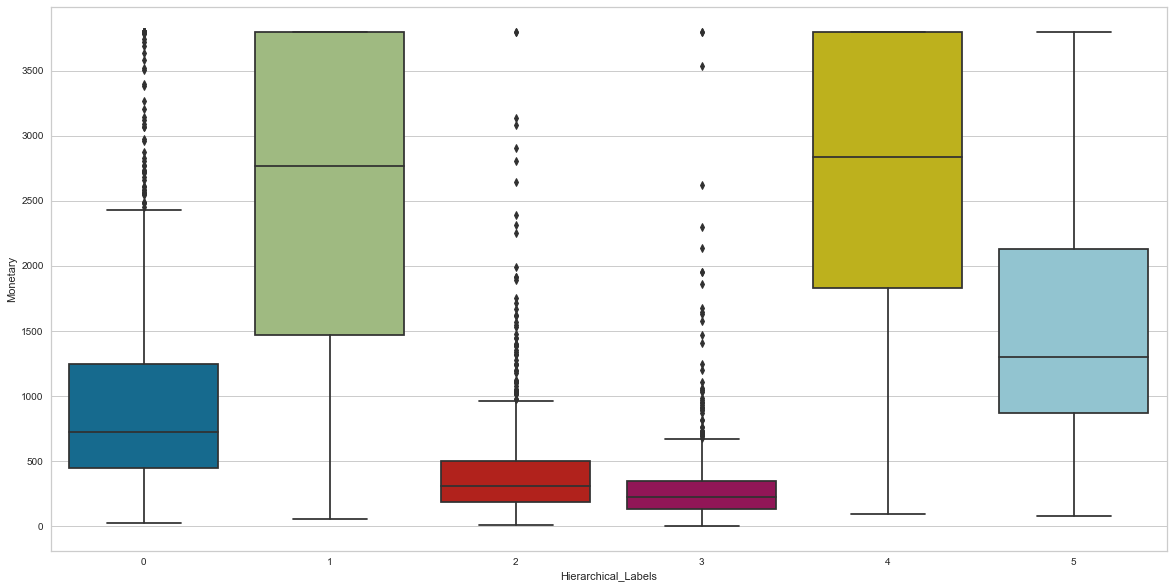

In [57]:
boxplot("Hierarchical_Labels","Monetary",rfm,True)